In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for the A/B test
# Assume 10000 users split between control and treatment groups
n_users = 10000
data = {
    'user_id': range(1, n_users + 1),
    'group': np.random.choice(['control', 'treatment'], size=n_users),
    'converted': np.random.choice([0, 1], size=n_users, p=[0.85, 0.15])  # Conversion rate of ~15%
}

# DataFrame from the generated data
df = pd.DataFrame(data)

print(df.head())

   user_id      group  converted
0        1    control          0
1        2  treatment          0
2        3    control          1
3        4    control          0
4        5    control          1



Conversion rates by group:
group
control      0.154798
treatment    0.147383
Name: converted, dtype: float64

T-statistic: 1.0350463291926721
P-value: 0.30067230941045797

There is no statistically significant difference in conversion rates between the groups.


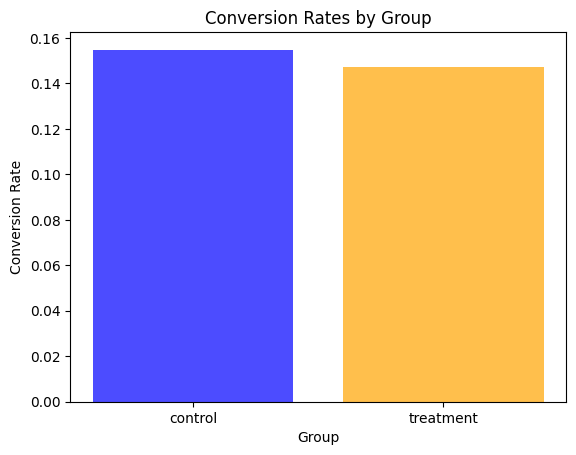

In [4]:
# Calculate conversion rates for each group (control and treatment)
conversion_rates = df.groupby('group')['converted'].mean()
print("\nConversion rates by group:")
print(conversion_rates)

# Perform a t-test to check if the difference in conversion rates is statistically significant
# Null hypothesis: There is no difference in conversion rates between the groups
control_group = df[df['group'] == 'control']['converted']
treatment_group = df[df['group'] == 'treatment']['converted']

t_stat, p_value = ttest_ind(control_group, treatment_group)
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results of the t-test
if p_value < 0.05:
    print("\nThe difference in conversion rates between the control and treatment groups is statistically significant.")
else:
    print("\nThere is no statistically significant difference in conversion rates between the groups.")

# Visualize the conversion rates using a bar plot
plt.bar(conversion_rates.index, conversion_rates.values, color=['blue', 'orange'], alpha=0.7)
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()